# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 4: Part 1 & Part 2 - Transfer Learning & Visualizing Activation Maps

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

## Code given in instructions 


In [1]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications
import numpy as np
import matplotlib.pyplot as plt
import time
from DataLoader import gen_labels_multiclass, get_data_multiclass, get_data_arrays, get_train_test_arrays_multiclass
from Models import vgg16_model, MLP_model
from Utils import loss_accuracy_plot, get_length, pretrain_data_label



## PART 1 - Transfer Learning 

### Task 1

#### Parameters

In [15]:
img_width, img_height = 224, 224
epochs = 150
batch_size = 8
LR = 0.00001
base = 128
dropout = 0.5
n_class = 2

#### Preparing Bone data and labels

In [5]:

train_data_dir_bone = 'Data/DL_course/Lab2/Bone/train/'
validation_data_dir_bone = 'Data/DL_course/Lab2/Bone/validation/' 
class_labels_bone = ["AFF", "NFF"]

train_data_bone, train_labels_bone, validation_data_bone, validation_labels_bone =pretrain_data_label(train_data_dir_bone, 
                                                                                                    validation_data_dir_bone, 
                                                                                                    img_width, img_height, 
                                                                                                    batch_size, 
                                                                                                    class_labels_bone)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

shape of bone validation data (96, 7, 7, 512)
shape of a bone training data sample (7, 7, 512)
shape of a bone validation labels (96,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


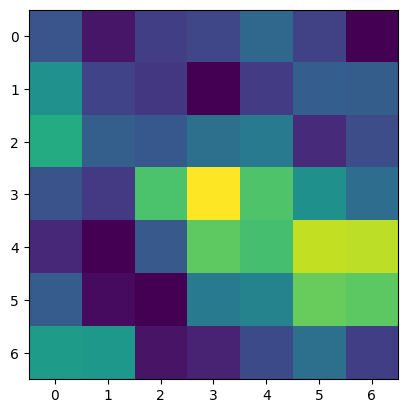

In [33]:
# Just for inspecting bone data 
print("shape of bone validation data",validation_data_bone.shape)
print("shape of a bone training data sample", train_data_bone[0].shape)
print("shape of a bone validation labels", validation_labels_bone.shape)
print(validation_labels_bone)
plt.imshow(validation_data_bone[5, 0:14,0:14,0])
plt.show()

#### Preparing Skin data and labels

In [6]:
train_data_dir_skin = 'Data/DL_course/Lab2/Skin/train/'
validation_data_dir_skin = 'Data/DL_course/Lab2/Skin/validation/'
class_labels_skin = ["Mel", "Nevi"]

train_data_skin, train_labels_skin, validation_data_skin, validation_labels_skin =pretrain_data_label(train_data_dir_skin, 
                                                                                                    validation_data_dir_skin, 
                                                                                                    img_width, img_height, 
                                                                                                    batch_size, 
                                                                                                    class_labels_skin)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

shape of skin validation data (200, 7, 7, 512)
shape of a skin training data sample (7, 7, 512)
shape of a skin validation labels (200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


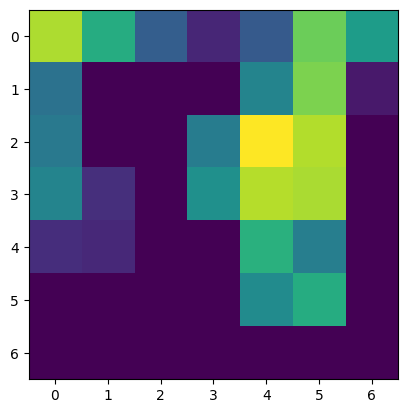

In [34]:
# Just for inspecting skin data 
print("shape of skin validation data",validation_data_skin.shape)
print("shape of a skin training data sample", train_data_skin[0].shape)
print("shape of a skin validation labels", validation_labels_skin.shape)
print(validation_labels_skin)
plt.imshow(validation_data_skin[5, 0:14,0:14,0])
plt.show()

### Task 2

### MLP training with pretrained VGG16 model

#### Bone dataset classification with pretrained VGG16

Epoch 1/150
139/139 [==============================] - 1s 4ms/step - loss: 0.6218 - sparse_categorical_accuracy: 0.6520 - val_loss: 0.3794 - val_sparse_categorical_accuracy: 0.9479
Epoch 2/150
139/139 [==============================] - 0s 3ms/step - loss: 0.3532 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.2383 - val_sparse_categorical_accuracy: 0.9896
Epoch 3/150
139/139 [==============================] - 0s 3ms/step - loss: 0.2352 - sparse_categorical_accuracy: 0.9595 - val_loss: 0.1568 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/150
139/139 [==============================] - 0s 3ms/step - loss: 0.1583 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.1138 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/150
139/139 [==============================] - 0s 3ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/150
139/139 [==============================] - 0s 3ms/step - loss: 0.1005 - sparse_cate

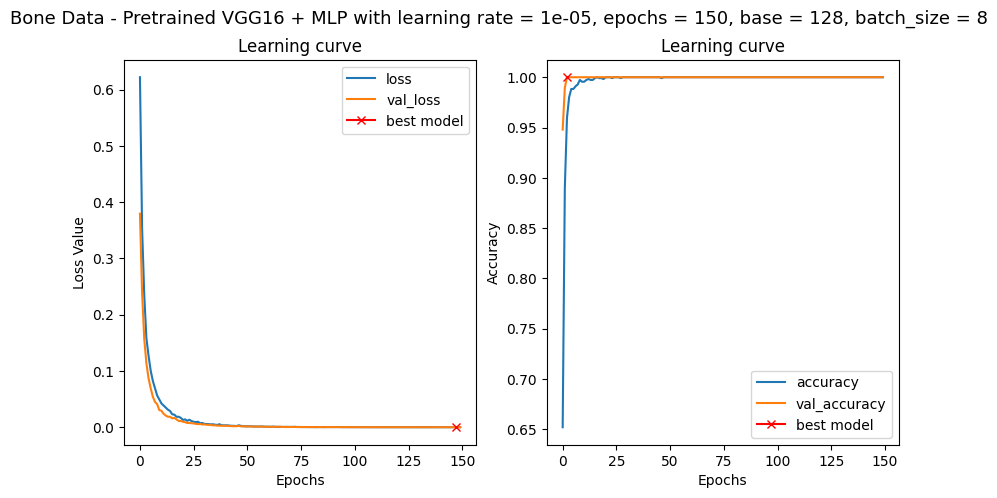

In [17]:
# TODO: Building the MLP model
MLP_clf_bone = MLP_model(base = base, dropout = dropout, n_class = n_class)
# TODO: Compile and train the model, plot learning curves

#We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']


MLP_clf_bone.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 

#timer to check how long it takes to train classifier with a pretrained VGG16 model
train_start = time.time()


clf_hist_bone = MLP_clf_bone.fit(train_data_bone, train_labels_bone, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=1, 
                       validation_data=(validation_data_bone, validation_labels_bone))

train_end = time.time()

print("training time: ", train_end - train_start)

loss_accuracy_plot(clf_hist_bone, "Bone Data - Pretrained VGG16 + MLP with learning rate = {}, epochs = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                base,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

#### Skin dataset classification with pretrained VGG16

Epoch 1/150
125/125 [==============================] - 1s 4ms/step - loss: 0.6887 - sparse_categorical_accuracy: 0.5950 - val_loss: 0.5171 - val_sparse_categorical_accuracy: 0.8350
Epoch 2/150
125/125 [==============================] - 0s 3ms/step - loss: 0.5125 - sparse_categorical_accuracy: 0.7650 - val_loss: 0.4494 - val_sparse_categorical_accuracy: 0.8550
Epoch 3/150
125/125 [==============================] - 0s 3ms/step - loss: 0.4715 - sparse_categorical_accuracy: 0.7940 - val_loss: 0.4192 - val_sparse_categorical_accuracy: 0.8650
Epoch 4/150
125/125 [==============================] - 0s 3ms/step - loss: 0.4485 - sparse_categorical_accuracy: 0.7920 - val_loss: 0.3992 - val_sparse_categorical_accuracy: 0.8500
Epoch 5/150
125/125 [==============================] - 0s 3ms/step - loss: 0.4167 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.3807 - val_sparse_categorical_accuracy: 0.8650
Epoch 6/150
125/125 [==============================] - 0s 3ms/step - loss: 0.4146 - sparse_cate

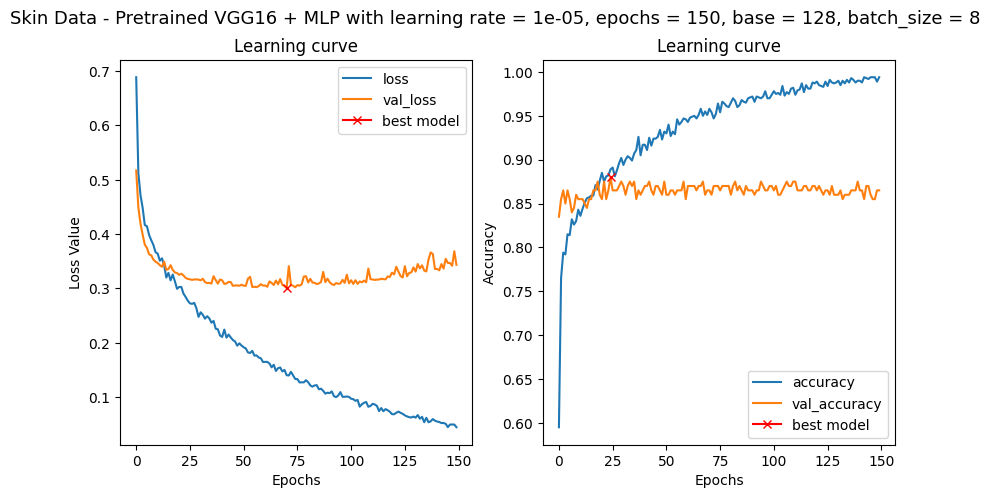

In [19]:
# TODO: Building the MLP model
MLP_clf_skin = MLP_model(base = base, dropout = dropout, n_class = n_class)
# TODO: Compile and train the model, plot learning curves

#We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']


MLP_clf_skin.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 

#timer to check how long it takes to train classifier with a pretrained VGG16 model
train_start = time.time()


clf_hist_skin = MLP_clf_skin.fit(train_data_skin, train_labels_skin, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=1, 
                       validation_data=(validation_data_skin, validation_labels_skin))

train_end = time.time()

print("training time: ", train_end - train_start)

loss_accuracy_plot(clf_hist_skin, "Skin Data - Pretrained VGG16 + MLP with learning rate = {}, epochs = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                base,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

### VGG16 Training from scratch

#### Bone dataset classification with VGG16 trained from scratch

In [38]:
data_path_bone = 'Data/DL_course/Lab1/Bone/' # Path to data root with two subdirs.
train_data_path_bone = os.path.join(data_path_bone, 'train')
test_data_path_bone = os.path.join(data_path_bone, 'test')

train_list_bone = os.listdir(train_data_path_bone)
test_list_bone = os.listdir(test_data_path_bone)

x_train_bone, x_test_bone, y_train_bone, y_test_bone = get_train_test_arrays_multiclass(
    train_data_path_bone, test_data_path_bone,
    train_list_bone, test_list_bone, img_height, img_width,  patterns = ["AFF", "NFF"])



Reading: 0/1072 of train images
Reading: 100/1072 of train images
Reading: 200/1072 of train images
Reading: 300/1072 of train images
Reading: 400/1072 of train images
Reading: 500/1072 of train images
Reading: 600/1072 of train images
Reading: 700/1072 of train images
Reading: 800/1072 of train images
Reading: 900/1072 of train images
Reading: 1000/1072 of train images
Reading: 0/140 of train images
Reading: 100/140 of train images


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 activation_85 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 conv2d_66 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 activation_86 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 112, 112, 128)     73856     
                                                     

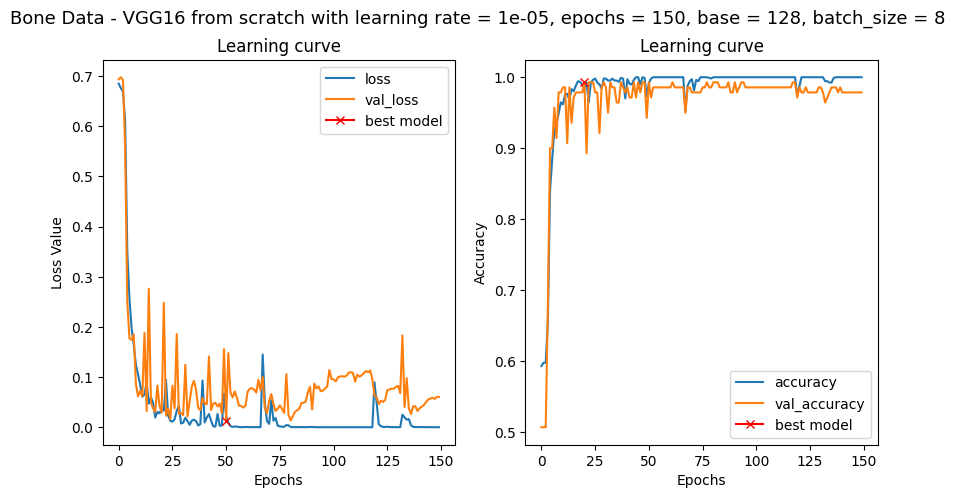

In [40]:
# Building the VGG16 model 
dense_layers = [128]
vgg16_clf_bone = vgg16_model(img_width, img_height, 1, n_base = 64, dropout = dropout, n_class = 2, dense_layers = dense_layers)
# Compile and train the model, plot learning curves

#We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']


vgg16_clf_bone.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 

#timer to check how long it takes to train VGG16 model from scratch
train_start = time.time()


vgg16_clf_hist_bone = vgg16_clf_bone.fit(x_train_bone, y_train_bone, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=1, 
                       validation_data=(x_test_bone, y_test_bone))

train_end = time.time()

print("training time: ", train_end - train_start)

loss_accuracy_plot(vgg16_clf_hist_bone, "Bone Data - VGG16 from scratch with learning rate = {}, epochs = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                base,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

#### Skin dataset classification with VGG16 trained from scratch

In [30]:
data_path_skin = 'Data/DL_course/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path_skin = os.path.join(data_path_skin, 'train')
test_data_path_skin = os.path.join(data_path_skin, 'test')

train_list_skin = os.listdir(train_data_path_skin)
test_list_skin = os.listdir(test_data_path_skin)

x_train_skin, x_test_skin, y_train_skin, y_test_skin = get_train_test_arrays_multiclass(
    train_data_path_skin, test_data_path_skin,
    train_list_skin, test_list_skin, img_height, img_width,  patterns = ["Mel", "Nev"])



Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 activation_55 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 activation_56 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 128)     73856     
                                                      

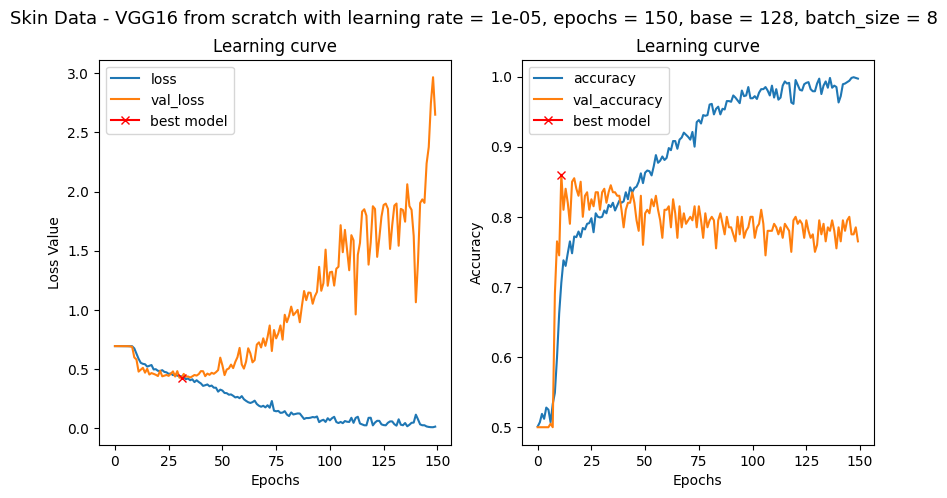

In [35]:
# Building the VGG16 model 

vgg16_clf_skin = vgg16_model(img_width, img_height, 1, n_base = 64, dropout = dropout, n_class = 2, dense_layers = dense_layers)
# Compile and train the model, plot learning curves

# We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']


vgg16_clf_skin.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 

#timer to check how long it takes to train VGG16 model from scratch
train_start = time.time()


vgg16_clf_hist_skin = vgg16_clf_skin.fit(x_train_skin, y_train_skin, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=1, 
                       validation_data=(x_test_skin, y_test_skin))

train_end = time.time()

print("training time: ", train_end - train_start)

loss_accuracy_plot(vgg16_clf_hist_skin, "Skin Data - VGG16 from scratch with learning rate = {}, epochs = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                base,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

## Visualizing Activation Maps

### Task 3

Here we run VGG16 with specified settings.

In [12]:
img_width, img_height = 128, 128
epochs = 80
batch_size = 8
LR = 0.00001

n_base = 8
dense_layers = [64, 64, 64] # 3 dense layers
dropout = 0.4
n_class = 2

In [13]:
train_data_dir_bone = 'Data/DL_course/Lab2/Bone/train/'
validation_data_dir_bone = 'Data/DL_course/Lab2/Bone/validation/' 


#Applying data augmentation techniques to training data
train_datagen = ImageDataGenerator(rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range=0.1,
                            rescale = 1./255,
                            horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(train_data_dir_bone,
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size,
                                                 class_mode="binary",
                                                 color_mode="grayscale",
                                                 shuffle=False)

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(validation_data_dir_bone, 
                                                target_size = (img_width, img_height), 
                                                batch_size=batch_size,
                                                class_mode = "binary",
                                                color_mode="grayscale",
                                                shuffle=False)

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 activation_17 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 8)       584       
                                                                 
 activation_18 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 16)        1168      
                                                      

<ipython-input-14-62e499370ccd>:22: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16_clf_hist_bone_128 = vgg16_clf_bone_128.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,


Epoch 1/80
139/139 [==============================] - 40s 280ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6929 - sparse_categorical_accuracy: 0.5656 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/80
139/139 [==============================] - 39s 280ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6924 - sparse_categorical_accuracy: 0.5737 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.5000
Epoch 3/80
139/139 [==============================] - 38s 276ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6916 - sparse_categorical_accuracy: 0.5773 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/80
139/139 [==============================] - 42s 301ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6905 - sparse_categorical_accuracy: 0.5818 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/80
139/139 [==============================] - 40s 292ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6899 - sparse_categorical_acc

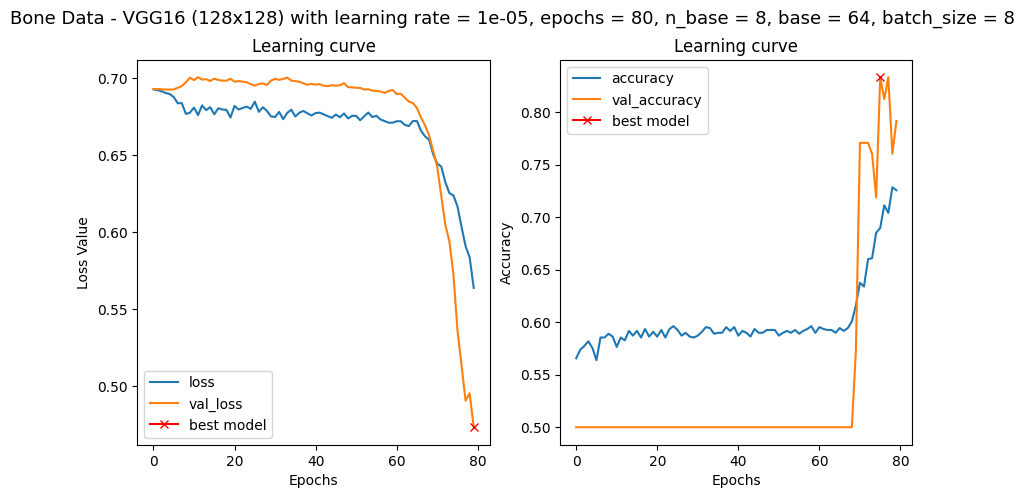

In [14]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
vgg16_clf_bone_128 = vgg16_model(img_width, img_height, 1, n_base = n_base, dropout = dropout, n_class = 2, dense_layers = dense_layers)


#We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']

step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size

vgg16_clf_bone_128.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 




vgg16_clf_hist_bone_128 = vgg16_clf_bone_128.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,
                                                           shuffle=True, epochs = epochs, verbose=1, 
                                                           validation_data=val_generator, validation_steps=step_size_val)



loss_accuracy_plot(vgg16_clf_hist_bone_128, "Bone Data - VGG16 (128x128) with learning rate = {}, epochs = {}, n_base = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                n_base, dense_layers[0] ,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

#### Visualization of the class activation maps

the predicted class label is 1


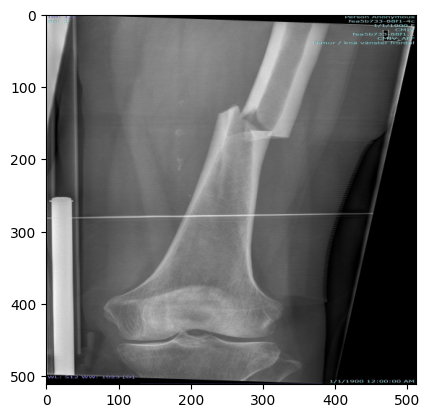

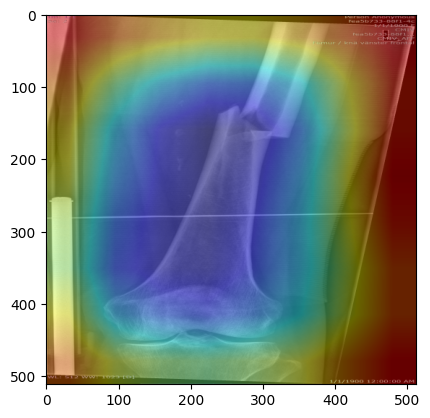

In [15]:
#Part 2

#Visualisation 

from tensorflow.keras import backend as K
from skimage.io import imread
from skimage.transform import resize
import cv2

sample_dir = 'Data/DL_course/Lab2/Bone/train/AFF/14.jpg' 
img = imread(sample_dir)
Img = img[:,:,0]
img = img/255
img = resize(Img, (img_height, img_width), anti_aliasing = True).astype('float32') 
img = np.expand_dims(img, axis = 2)
img = np.expand_dims(img, axis = 0)

preds = vgg16_clf_bone_128.predict(img)
class_idx = np.argmax(preds[0])
print('the predicted class label is {}'.format(class_idx))
class_output = vgg16_clf_bone_128.output[:, class_idx]
last_conv_layer = vgg16_clf_bone_128.get_layer("Last_ConvLayer")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([vgg16_clf_bone_128.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([img])

for i in range(n_base*8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img_ = cv2.imread(sample_dir)
img_ = cv2.resize(img_, (512, 512), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img_.shape[1], img_.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img_)
plt.figure()
plt.imshow(superimposed_img)
plt.show()

#### Additional Experiment

Considering the validation accuracy was low and the activation map was not concentrated on the bone, we ran a second model with 
- epochs = 50
- n_base = 64

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 activation_34 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 activation_35 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 128)       73856     
                                                      

<ipython-input-16-ba50ab05e317>:22: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16_clf_hist_bone_128_base_64 = vgg16_clf_bone_128_base_64.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,


Epoch 1/50
139/139 [==============================] - 42s 289ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6929 - sparse_categorical_accuracy: 0.5387 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/50
139/139 [==============================] - 39s 279ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6903 - sparse_categorical_accuracy: 0.5567 - val_loss: 0.6927 - val_sparse_categorical_accuracy: 0.5000
Epoch 3/50
139/139 [==============================] - 39s 281ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6823 - sparse_categorical_accuracy: 0.5549 - val_loss: 0.7174 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/50
139/139 [==============================] - 38s 273ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6922 - sparse_categorical_accuracy: 0.5647 - val_loss: 0.6922 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/50
139/139 [==============================] - 39s 282ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6875 - sparse_categorical_acc

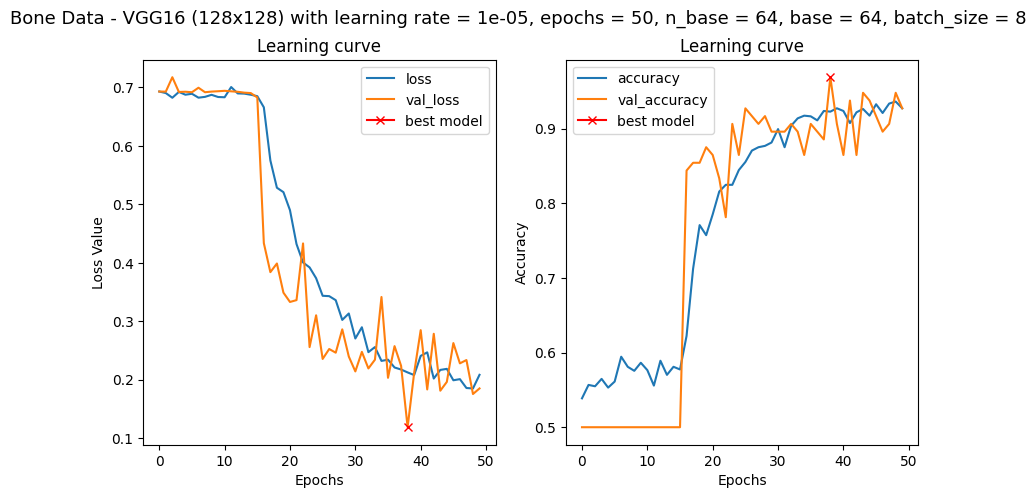

In [16]:
epochs = 50
n_base = 64
vgg16_clf_bone_128_base_64 = vgg16_model(img_width, img_height, 1, n_base = n_base, dropout = dropout, n_class = 2, dense_layers = dense_layers)


#We used sparse categorical cross entropy and sparse categorical accuracy to have 2 neuorns and softmax in last layer
# and to keep labels as integers instead of one hot encoded
loss = "sparse_categorical_crossentropy"
metrics = ["sparse_categorical_accuracy"]

# loss = "BinaryCrossentropy"
# metrics = ['binary_accuracy']

step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size

vgg16_clf_bone_128_base_64.compile(loss=loss, optimizer = Adam(learning_rate = LR), metrics=metrics) 




vgg16_clf_hist_bone_128_base_64 = vgg16_clf_bone_128_base_64.fit_generator(generator = train_generator,steps_per_epoch = step_size_train,
                                                           shuffle=True, epochs = epochs, verbose=1, 
                                                           validation_data=val_generator, validation_steps=step_size_val)



loss_accuracy_plot(vgg16_clf_hist_bone_128_base_64, "Bone Data - VGG16 (128x128) with learning rate = {}, epochs = {}, n_base = {}, base = {}, batch_size = {}".format(LR, epochs,
                                                                                                n_base, dense_layers[0] ,batch_size), 
                                                                                                accuracy = "sparse_categorical_accuracy")

the predicted class label is 1


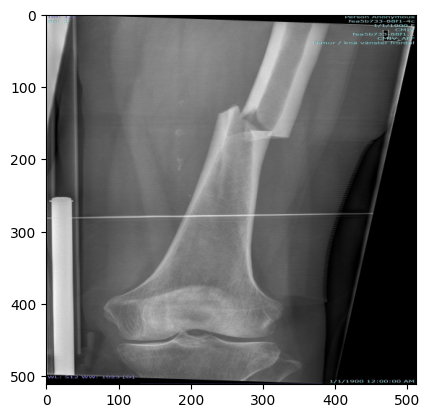

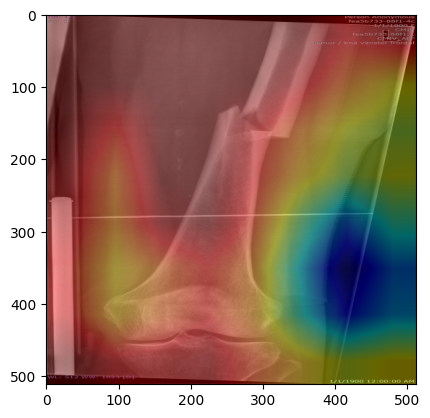

In [17]:


from tensorflow.keras import backend as K
from skimage.io import imread
from skimage.transform import resize
import cv2

sample_dir = 'Data/DL_course/Lab2/Bone/train/AFF/14.jpg' 
img = imread(sample_dir)
Img = img[:,:,0]
img = img/255
img = resize(Img, (img_height, img_width), anti_aliasing = True).astype('float32') 
img = np.expand_dims(img, axis = 2)
img = np.expand_dims(img, axis = 0)

preds = vgg16_clf_bone_128_base_64.predict(img)
class_idx = np.argmax(preds[0])
print('the predicted class label is {}'.format(class_idx))
class_output = vgg16_clf_bone_128_base_64.output[:, class_idx]
last_conv_layer = vgg16_clf_bone_128_base_64.get_layer("Last_ConvLayer")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([vgg16_clf_bone_128_base_64.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([img])

for i in range(n_base*8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img_ = cv2.imread(sample_dir)
img_ = cv2.resize(img_, (512, 512), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img_.shape[1], img_.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img_)
plt.figure()
plt.imshow(superimposed_img)
plt.show()

As we can see from the results, the validation accuracy increased this time and activation maps show that model concentrated more on the bone structure.